<a href="https://colab.research.google.com/github/MohsenJadidi/ISLR/blob/master/Assignment3/Q1(first_step).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3 - Q1 (Fraud-detection using logistic regression)
Statistical Learning Theory Course - Fall 2020 @ AUT

Author: https://ipythonquant.wordpress.com/2018/05/08/from-logistic-regression-in-scikit-learn-to-deep-learning-with-tensorflow-a-fraud-detection-case-study-part-i/

Modify and extend by: MohammadMohsen Jadidi | email : mohsenjadidi@aut.ac.ir

## Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Read Dataset

Number of Class 0 =  181766
Number of Class 1 =  365
(numClass0/(numClass0+numClass1))*100 = 99.799595


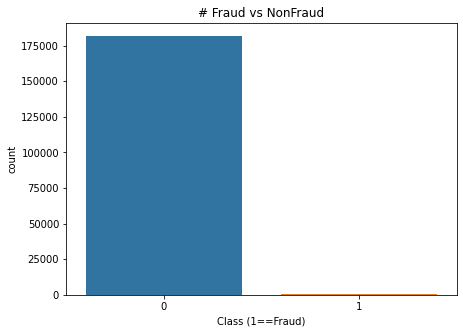

In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

address = '/content/drive/My Drive/ISLR Course - Fall 2020/Assignment3/creditcard.csv'
credit_card = pd.read_csv(address)

f, ax = plt.subplots(figsize=(7, 5))
sn.countplot(x='Class', data=credit_card)
_ = plt.title('# Fraud vs NonFraud')
_ = plt.xlabel('Class (1==Fraud)')

numClass0 = credit_card['Class'].value_counts()[0]
numClass1 = credit_card['Class'].value_counts()[1]

print('Number of Class 0 = ', numClass0)
print('Number of Class 1 = ', numClass1)
print('(numClass0/(numClass0+numClass1))*100 = {:4f}'.format(numClass0/(numClass0+numClass1)*100))

## Preprocessing

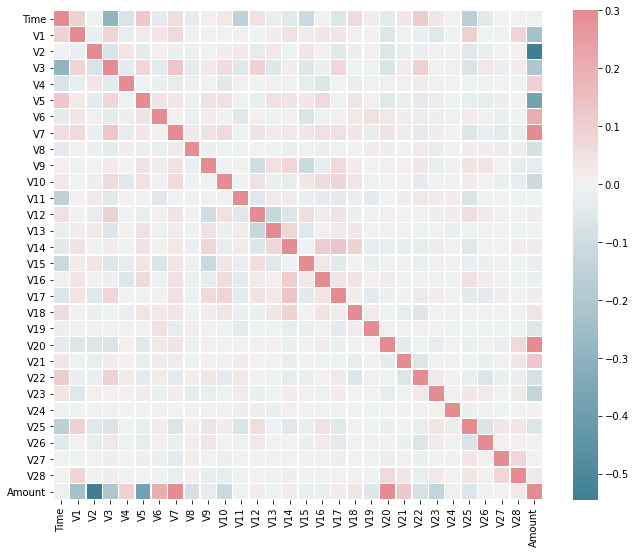

In [3]:
from sklearn.model_selection import train_test_split

X = credit_card.drop(columns='Class', axis=1)
y = credit_card.Class.values

corr = X.corr() # correlation matrix 

#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True
cmap = sn.diverging_palette(220, 10, as_cmap=True)
 
# Draw the heatmap with the mask and correct aspect ratio
f, ax = plt.subplots(figsize=(11, 9))
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
sn.heatmap(corr, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5)

np.random.seed(seed=42)
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.25)

## Logistic Regression

Train accuracy: 99.8975 %
Train AUC: 97.8695 %
Test accuracy: 99.9012 %
Test AUC: 97.8463 %


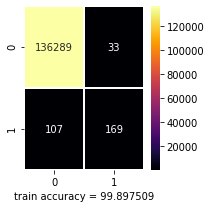

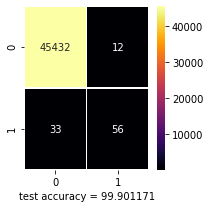

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 
'''
scaler = StandardScaler()
lr = LogisticRegression()
model1 = Pipeline([('standardize', scaler), ('log_reg', lr)])
model1.fit(X_train, y_train)

y_train_hat = model1.predict(X_train)
y_train_hat_probs = model1.predict_proba(X_train)[:,1]
train_accuracy = accuracy_score(y_train, y_train_hat)*100
train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)*100
print('Confusion matrix:\n', confusion_matrix(y_train, y_train_hat))
print('Training accuracy: %.4f %%' % train_accuracy)
print('Training AUC: %.4f %%' % train_auc_roc)
'''
scaler = StandardScaler()
regressor = LogisticRegression()
regressor.fit(scaler.fit_transform(X_train), y_train)

y_train_hat = regressor.predict(scaler.transform(X_train))
y_train_hat_probs = regressor.predict_proba(scaler.transform(X_train))[:,1]
train_accuracy = accuracy_score(y_train, y_train_hat)*100
train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)*100
confusionMatrix = confusion_matrix(y_train, y_train_hat)
plt.figure(figsize=[3,3])
sn.heatmap(confusionMatrix, cmap='inferno', annot=True, fmt='d', linewidths=.25)
plt.xlabel('train accuracy = {:4f}'.format(train_accuracy))
plt.tight_layout()
print('Train accuracy: %.4f %%' % train_accuracy)
print('Train AUC: %.4f %%' % train_auc_roc)

y_test_hat = regressor.predict(scaler.transform(X_test))
y_test_hat_probs = regressor.predict_proba(scaler.transform(X_test))[:,1]
test_accuracy = accuracy_score(y_test, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100
confusionMatrix = confusion_matrix(y_test, y_test_hat)
plt.figure(figsize=[3,3])
sn.heatmap(confusionMatrix, cmap='inferno', annot=True, fmt='d', linewidths=.25)
plt.xlabel('test accuracy = {:4f}'.format(test_accuracy))
plt.tight_layout()
print('Test accuracy: %.4f %%' % test_accuracy)
print('Test AUC: %.4f %%' % test_auc_roc)

## Receiver-Operator-Curve

              precision    recall  f1-score   support

           0   0.998967  0.999824  0.999395     45444
           1   0.840000  0.471910  0.604317        89

    accuracy                       0.998792     45533
   macro avg   0.919483  0.735867  0.801856     45533
weighted avg   0.998656  0.998792  0.998623     45533



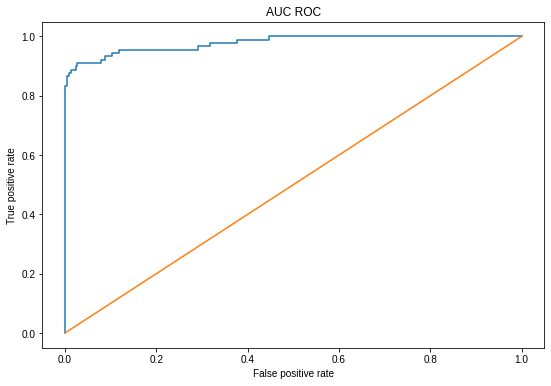

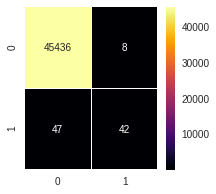

In [5]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_hat_probs, drop_intermediate=True)
 
f, ax = plt.subplots(figsize=(9, 6))
_ = plt.plot(fpr, tpr, [0,1], [0, 1])
_ = plt.title('AUC ROC')
_ = plt.xlabel('False positive rate')
_ = plt.ylabel('True positive rate')
plt.style.use('seaborn')

# Assume that set the threshold to 90% 
y_hat_90 = (y_test_hat_probs > 0.90 )*1
confusionMatrix = confusion_matrix(y_test, y_hat_90)
plt.figure(figsize=[3,3])
sn.heatmap(confusionMatrix, cmap='inferno', annot=True, fmt='d', linewidths=.25)
print(classification_report(y_test, y_hat_90, digits=6))

## LogisticRegression with Tensorflow2

### Create Model

In [10]:
import tensorflow as tf
from tensorflow.keras import Model

n_input = 30
n_output = 2

class MyModel:
    def __init__(self):
        super(MyModel,self).__init__()
        self.W = tf.Variable(tf.ones([n_input, n_output]), trainable=True, name="weight")
        self.b = tf.Variable(tf.zeros([n_output]), trainable=True, name="bias")
    def __call__(self, x):
        return tf.nn.softmax(tf.matmul(x, self.W) + self.b)
    
def loss(y_pred, y_true):
    # Encode label to a one hot vector
    y_true = tf.one_hot(y_true, depth=n_output)
    
    # Clip prediction values to avoid log(0) error
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    
    # Compute cross-entropy
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred),1))

def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# SGD optimizer 
#optimizer = tf.optimizers.SGD(lr = 0.1)
# Adam optimizer 
optimizer = tf.optimizers.Adam(lr = 0.1)
    
def train(model, x, y):
    with tf.GradientTape() as t:
        pred = model(x)
        current_loss = loss(pred, y)
        print('Current Loss: ', current_loss.numpy())
    # Compute gradients
    gradients = t.gradient(current_loss, [model.W, model.b])
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [model.W, model.b]))

### Train Model

Train Model (Without batch)

Current Loss:  0.6931473
Current Loss:  0.041877285
Current Loss:  0.041873712
Current Loss:  0.041872762
Current Loss:  0.041872393
Current Loss:  0.041872215
Current Loss:  0.041872118
Current Loss:  0.04187206
Current Loss:  0.04187203
Current Loss:  0.041872002
Current Loss:  0.041871987
Current Loss:  0.041871972
Current Loss:  0.04187197
Current Loss:  0.041871965
Current Loss:  0.041871957
Current Loss:  0.041871954
Current Loss:  0.041871954
Current Loss:  0.04187195
Current Loss:  0.041871946
Current Loss:  0.041871946
Current Loss:  0.041871943
Current Loss:  0.041871943
Current Loss:  0.041871943
Current Loss:  0.04187194
Current Loss:  0.04187194
Current Loss:  0.04187194
Current Loss:  0.04187194
Current Loss:  0.04187194
Current Loss:  0.04187194
Current Loss:  0.04187194
Current Loss:  0.04187194
Current Loss:  0.04187194
Current Loss:  0.04187194
Current Loss:  0.04187194
Current Loss:  0.041871935
Current Loss:  0.041871935
Current Loss:  0.041871935
Current Loss:  0.0

Text(0, 0.5, 'Acc')

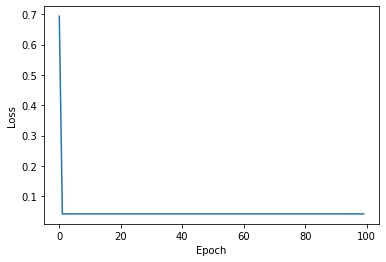

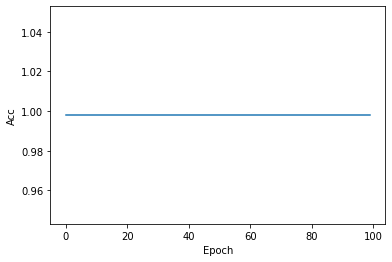

In [11]:
model = MyModel()
epochs = 100
losses = []
acces = []

for epoch_count in range(epochs):
    current_loss = loss(model(np.float32(X_train)), y_train)
    losses.append(current_loss)
    
    current_acc = accuracy(model(np.float32(X_train)), y_train)
    acces.append(current_acc)
    # Train the model
    train(model, np.float32(X_train), y_train)
    
import matplotlib.pyplot as plt
plt.figure()
plt.plot(losses) 
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.figure()
plt.plot(acces)    
plt.xlabel('Epoch')
plt.ylabel('Acc')

## Train Model (With batch)

Current Loss:  0.6931472
Current Loss:  0.040385783
Current Loss:  0.040355384
Current Loss:  0.038230892
Current Loss:  0.038230892
Current Loss:  0.031859074
Current Loss:  0.05309846
Current Loss:  0.03610695
Current Loss:  0.044602707
Current Loss:  0.046726644
Current Loss:  0.03610695
Current Loss:  0.044602707
Current Loss:  0.05097452
Current Loss:  0.042478766
>>>>>>> Epoch 0 Loss: 0.04187192767858505
Current Loss:  0.04035483
Current Loss:  0.05097452
Current Loss:  0.03610695
Current Loss:  0.042478766
Current Loss:  0.029735137
Current Loss:  0.04035483
Current Loss:  0.04885058
Current Loss:  0.046726644
Current Loss:  0.031859074
Current Loss:  0.033983015
Current Loss:  0.061594214
Current Loss:  0.038230892
Current Loss:  0.046726644
Current Loss:  0.038230892
>>>>>>> Epoch 1 Loss: 0.04187192767858505
Current Loss:  0.057346337
Current Loss:  0.03610695
Current Loss:  0.029735137
Current Loss:  0.04035483
Current Loss:  0.038230892
Current Loss:  0.038230892
Current Los

Text(0, 0.5, 'Acc')

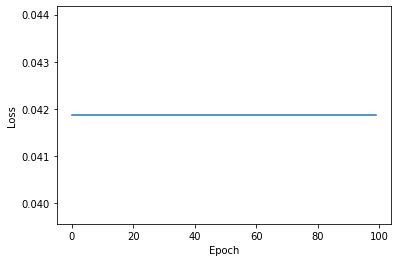

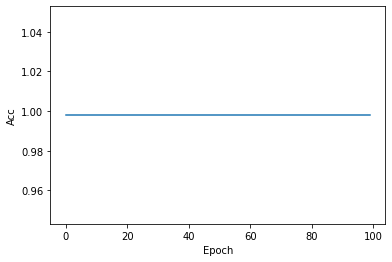

In [12]:
# Initialize the model
model = MyModel()
epochs = 100
batch = 9757
losses = []
acces = []

y_train_temp = np.reshape(y_train, [np.shape(y_train)[0], 1])
xy_train = np.concatenate((X_train, y_train_temp), axis=1)

for epoch_count in range(epochs):
    np.random.shuffle(xy_train)
    X = xy_train[:, 0:(xy_train.shape[1]-1)]
    y = xy_train[:, (xy_train.shape[1]-1)]

    for i in range(int((xy_train.shape[0]/batch))):
      X_batch = X[i*batch:(i+1)*batch, :]
      y_batch = y[i*batch:(i+1)*batch]

      # Train the model
      train(model, np.float32(X_batch), y_batch)

    current_loss = loss(model(np.float32(X)), y)
    current_acc = accuracy(model(np.float32(X)), y)

    losses.append(current_loss)
    acces.append(current_acc)

    print('>>>>>>> Epoch {} Loss: {}'.format(epoch_count, current_loss.numpy()))
    
import matplotlib.pyplot as plt
plt.figure()
plt.plot(losses) 
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.figure()
plt.plot(acces)    
plt.xlabel('Epoch')
plt.ylabel('Acc')   